In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#load and combining of training and test data and labels:
train_data1 = pd.read_csv('trainData1.csv',header=None)
train_data2 = pd.read_csv('trainData2.csv',header=None)
train_data3 = pd.read_csv('trainData3.csv',header=None)
train_data4 = pd.read_csv('trainData4.csv',header=None)
train_data5 = pd.read_csv('trainData5.csv',header=None)

train_labels1 = pd.read_csv('trainLabels1.csv',header=None)
train_labels2 = pd.read_csv('trainLabels2.csv',header=None)
train_labels3 = pd.read_csv('trainLabels3.csv',header=None)
train_labels4 = pd.read_csv('trainLabels4.csv',header=None)
train_labels5 = pd.read_csv('trainLabels5.csv',header=None)


#Combine the training data and labels
train_data_combined = pd.concat([train_data1, train_data2, train_data3, train_data4, train_data5], ignore_index=False)
train_labels_combined = pd.concat([train_labels1, train_labels2, train_labels3, train_labels4, train_labels5], ignore_index=False)


X_train = train_data_combined.values
y_train= train_labels_combined.values.flatten()  

#Load test data
test_data = pd.read_csv('testData.csv', header=None)
test_labels = pd.read_csv('testLabels.csv', header=None)

X_test = test_data.values
y_test = test_labels.values.flatten()

# Map labels from 5 and 6 to 0 and 1
y_train = np.where(y_train == 5, 0, 1)
y_test = np.where(y_test == 5, 0, 1)



In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, w, w0):
    m = len(y)
    z = np.dot(X, w) + w0
    h = sigmoid(z)
    epsilon = 1e-5  # Small value to prevent log(0)
    cost = (-1 / m) * (np.dot(y, np.log(h + epsilon)) + np.dot(1 - y, np.log(1 - h + epsilon)))
    return cost


In [55]:
# Gradient descent function with tracking
def gradient_descent(X_train, y_train, X_test, y_test, w, w0, learning_rate, epochs):
    m = len(y_train)
    cost_history_train = []
    cost_history_test = []
    error_history_train = []
    error_history_test = []

    for epoch in range(epochs):
        # Compute predictions on training data
        z_train = np.dot(X_train, w) + w0
        h_train = sigmoid(z_train)

        # Compute gradients
        dw = (1 / m) * np.dot(X_train.T, (h_train - y_train))
        dw0 = (1 / m) * np.sum(h_train - y_train)

        # Update parameters
        w -= learning_rate * dw
        w0 -= learning_rate * dw0

        # Compute and store training cost
        cost_train = compute_cost(X_train, y_train, w, w0)
        cost_history_train.append(cost_train)

        # Compute training error
        predictions_train = (h_train >= 0.5).astype(int)
        error_train = np.mean(predictions_train != y_train) * 100
        error_history_train.append(error_train)

        # Compute and store test cost
        cost_test = compute_cost(X_test, y_test, w, w0)
        cost_history_test.append(cost_test)

        # Compute test error
        z_test = np.dot(X_test, w) + w0
        h_test = sigmoid(z_test)
        predictions_test = (h_test >= 0.5).astype(int)
        error_test = np.mean(predictions_test != y_test) * 100
        error_history_test.append(error_test)

        # Convergence check (optional)
        if epoch > 0 and abs(cost_history_train[-2] - cost_history_train[-1]) < 1e-6:
            print(f'Convergence reached at epoch {epoch}')
            break

    return w, w0, cost_history_train, cost_history_test, error_history_train, error_history_test


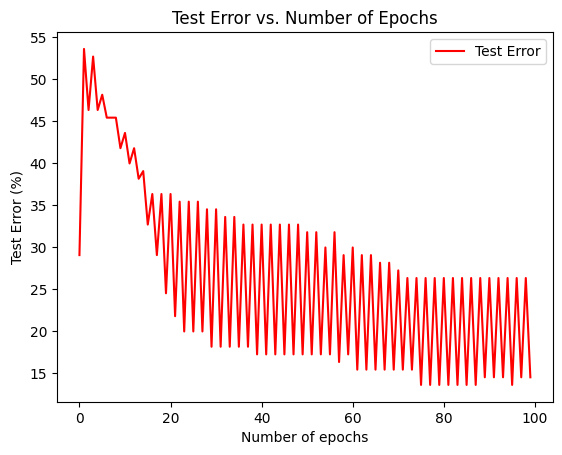

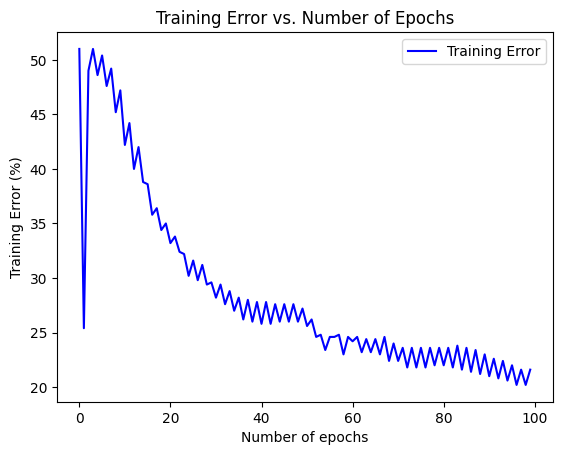

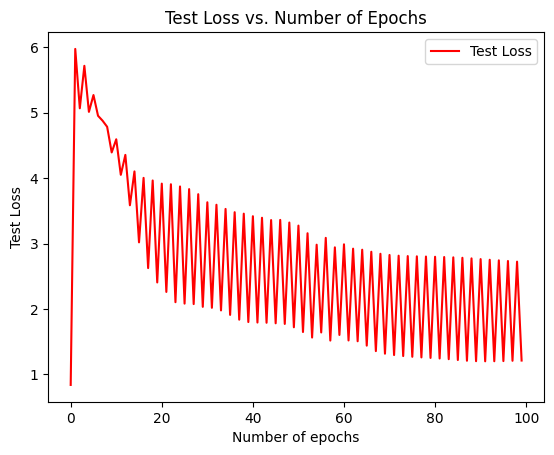

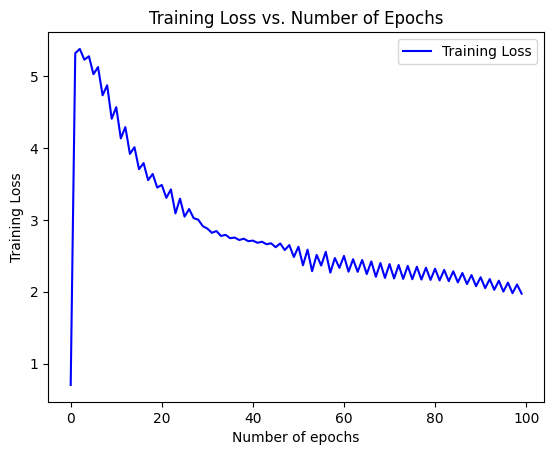

Parameters found:
w = [ 0.08724817  0.50032393 -1.06259114 -0.94085622 -0.92336476 -2.98644363
 -1.06177434 -0.06841979 -1.19240351 -0.79460839 -0.86162571 -0.29436657
 -1.10579052 -2.77448524 -0.39010331  0.91308612 -0.46406611 -1.00656815
 -0.52258387  0.24393002 -0.82610529  0.73895703  0.90559171  0.61937758
 -0.85134229 -1.45104757  0.22975381 -0.78085331 -1.21234629 -0.1366518
  0.96037899 -0.23707899 -0.36412857  0.60635053  1.38835179  0.39778704
 -0.41402704  0.27285645  0.10714356  0.57340011  0.38723798  0.01058866
  3.74663793  1.83815162  0.21164787 -0.04167009  0.81090205 -0.29617888
 -0.13277583  0.56830643  0.72205013  0.62453547 -1.21082278  0.43782191
  1.89534312  0.09646212  0.57233413  0.52480259 -2.38164859 -0.75183887
  0.07886084  1.1290634   0.70411443  0.36870433]
w0 = -0.05500386589717539


In [65]:
# Main function to run logistic regression
def logistic_regression():
    m, n = X_train.shape

    # Initialize parameters
    w = np.zeros(n)
    w0 = 0
    learning_rate = 0.1
    epochs = 100

    # Perform gradient descent with tracking
    w, w0, cost_history_train, cost_history_test, error_history_train, error_history_test = gradient_descent(
        X_train, y_train, X_test, y_test, w, w0, learning_rate, epochs)

    # (a) Plot test error vs. number of epochs
    plt.figure()
    plt.plot(range(len(error_history_test)), error_history_test, label='Test Error', color='red')
    plt.xlabel('Number of epochs')
    plt.ylabel('Test Error (%)')
    plt.title('Test Error vs. Number of Epochs')
    plt.legend()
    plt.show()

    # (b) Plot training error vs. number of epochs
    plt.figure()
    plt.plot(range(len(error_history_train)), error_history_train, label='Training Error', color='blue')
    plt.xlabel('Number of epochs')
    plt.ylabel('Training Error (%)')
    plt.title('Training Error vs. Number of Epochs')
    plt.legend()
    plt.show()

    # (c) Plot test loss vs. number of epochs
    plt.figure()
    plt.plot(range(len(cost_history_test)), cost_history_test, label='Test Loss', color='red')
    plt.xlabel('Number of epochs')
    plt.ylabel('Test Loss')
    plt.title('Test Loss vs. Number of Epochs')
    plt.legend()
    plt.show()

    # (d) Plot training loss vs. number of epochs
    plt.figure()
    plt.plot(range(len(cost_history_train)), cost_history_train, label='Training Loss', color='blue')
    plt.xlabel('Number of epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs. Number of Epochs')
    plt.legend()
    plt.show()

    # (e) Print the parameters w, w0 found for logistic regression
    print('Parameters found:')
    print(f'w = {w}')
    print(f'w0 = {w0}')

    # Evaluate on test data
    z_test = np.dot(X_test, w) + w0
    predictions = sigmoid(z_test) >= 0.5  # Binary classification threshold at 0.5

# Run the logistic regression function
if __name__ == "__main__":
    logistic_regression()


In [61]:
# Regularized cost function
def compute_cost_regularized(X, y, w, w0, lambda_):
    m = len(y)
    z = np.dot(X, w) + w0
    h = sigmoid(z)
    epsilon = 1e-5  # Small value to prevent log(0)
    L_old = (-1 / m) * (np.dot(y, np.log(h + epsilon)) + np.dot(1 - y, np.log(1 - h + epsilon)))
    regularization_term = 0.5 * lambda_ * np.sum(w ** 2)
    cost = L_old + regularization_term
    return cost


In [62]:
# Regularized gradient descent function
def gradient_descent_regularized(X_train, y_train, X_test, y_test, w, w0, learning_rate, epochs, lambda_):
    m = len(y_train)
    cost_history_train = []
    cost_history_test = []
    error_history_train = []
    error_history_test = []

    for epoch in range(epochs):
        # Compute predictions on training data
        z_train = np.dot(X_train, w) + w0
        h_train = sigmoid(z_train)

        # Compute gradients
        dw = (1 / m) * np.dot(X_train.T, (h_train - y_train)) + lambda_ * w
        dw0 = (1 / m) * np.sum(h_train - y_train)  # Bias term is not regularized

        # Update parameters
        w -= learning_rate * dw
        w0 -= learning_rate * dw0

        # Compute and store training cost
        cost_train = compute_cost_regularized(X_train, y_train, w, w0, lambda_)
        cost_history_train.append(cost_train)

        # Compute training error
        predictions_train = (h_train >= 0.5).astype(int)
        error_train = np.mean(predictions_train != y_train) * 100
        error_history_train.append(error_train)

        # Compute and store test cost
        cost_test = compute_cost_regularized(X_test, y_test, w, w0, lambda_)
        cost_history_test.append(cost_test)

        # Compute test error
        z_test = np.dot(X_test, w) + w0
        h_test = sigmoid(z_test)
        predictions_test = (h_test >= 0.5).astype(int)
        error_test = np.mean(predictions_test != y_test) * 100
        error_history_test.append(error_test)

        # Convergence check (optional)
        if epoch > 0 and abs(cost_history_train[-2] - cost_history_train[-1]) < 1e-6:
            print(f'Convergence reached at epoch {epoch}')
            break

    return w, w0, cost_history_train, cost_history_test, error_history_train, error_history_test


Running logistic regression with λ = 0.5


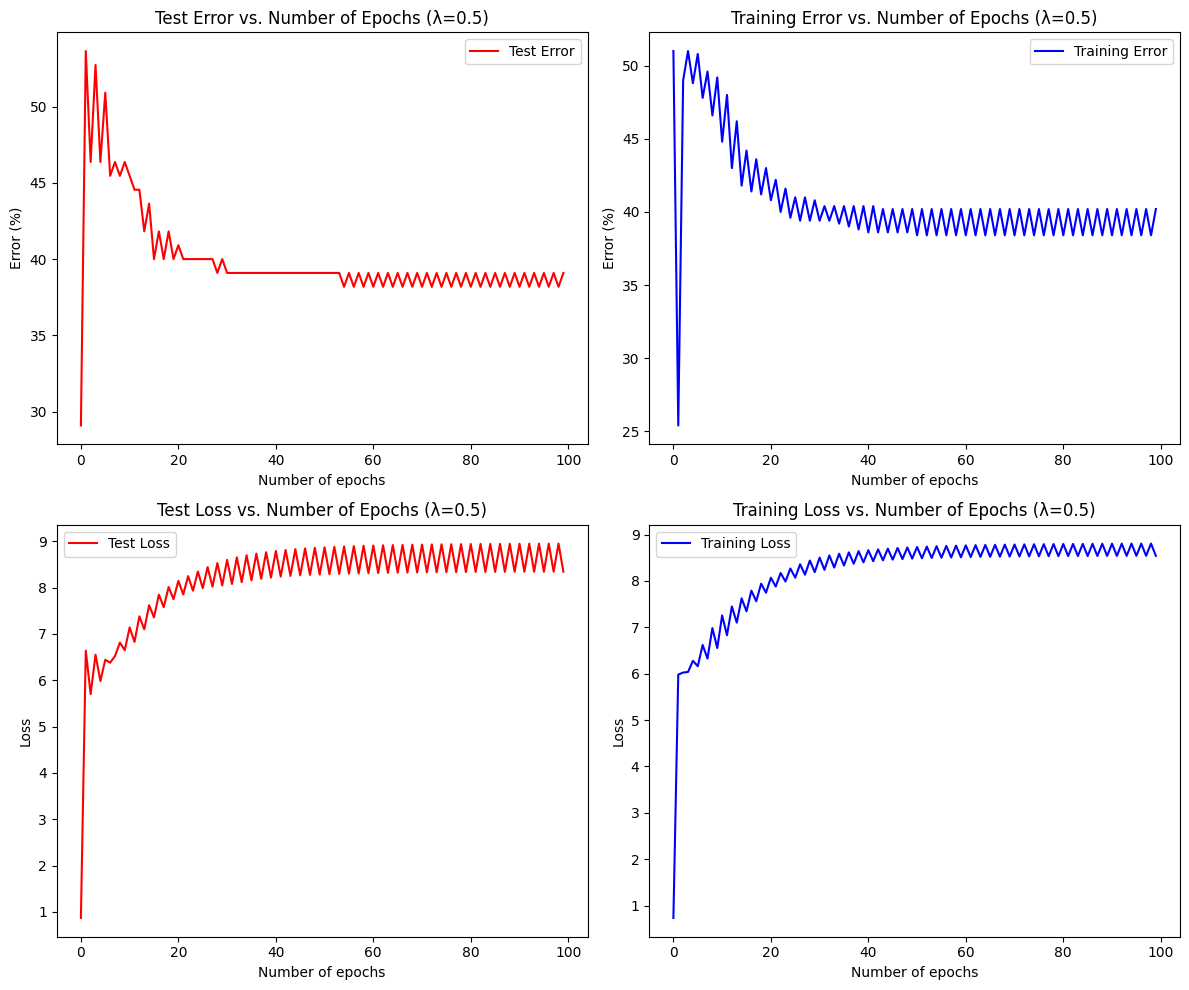

Parameters found for λ=0.5:
w = [-0.00203741 -0.0192353  -0.85224054 -0.51644291 -0.89710803 -1.52265
 -0.53348805 -0.05144559 -0.35020059 -0.67035974 -0.8410454  -0.29975818
 -0.67486428 -1.18007508 -0.27436498  0.08229476 -0.17947735 -0.67165573
 -0.4806948   0.05657347 -0.55039167  0.08125565  0.12727234  0.16552544
 -0.28459254 -0.61932651 -0.14117342 -0.7195206  -0.68121734 -0.43733459
  0.1432803  -0.15049201 -0.09623713  0.20508896  0.69574873  0.02218448
 -0.12453922  0.02251137 -0.0789111   0.10831117  0.10249337  0.05158411
  1.59664819  0.84205014 -0.03681881 -0.19332068  0.40642002 -0.20558004
  0.02097599  0.06180062  0.27914867  0.25257293 -0.70749573  0.21323992
  0.94724957 -0.03554147  0.03790862 -0.07128152 -1.22156338 -0.51185167
  0.0582158   0.71446675  0.24138406  0.04348874]
w0 = -0.1327808994436658

Running logistic regression with λ = 1


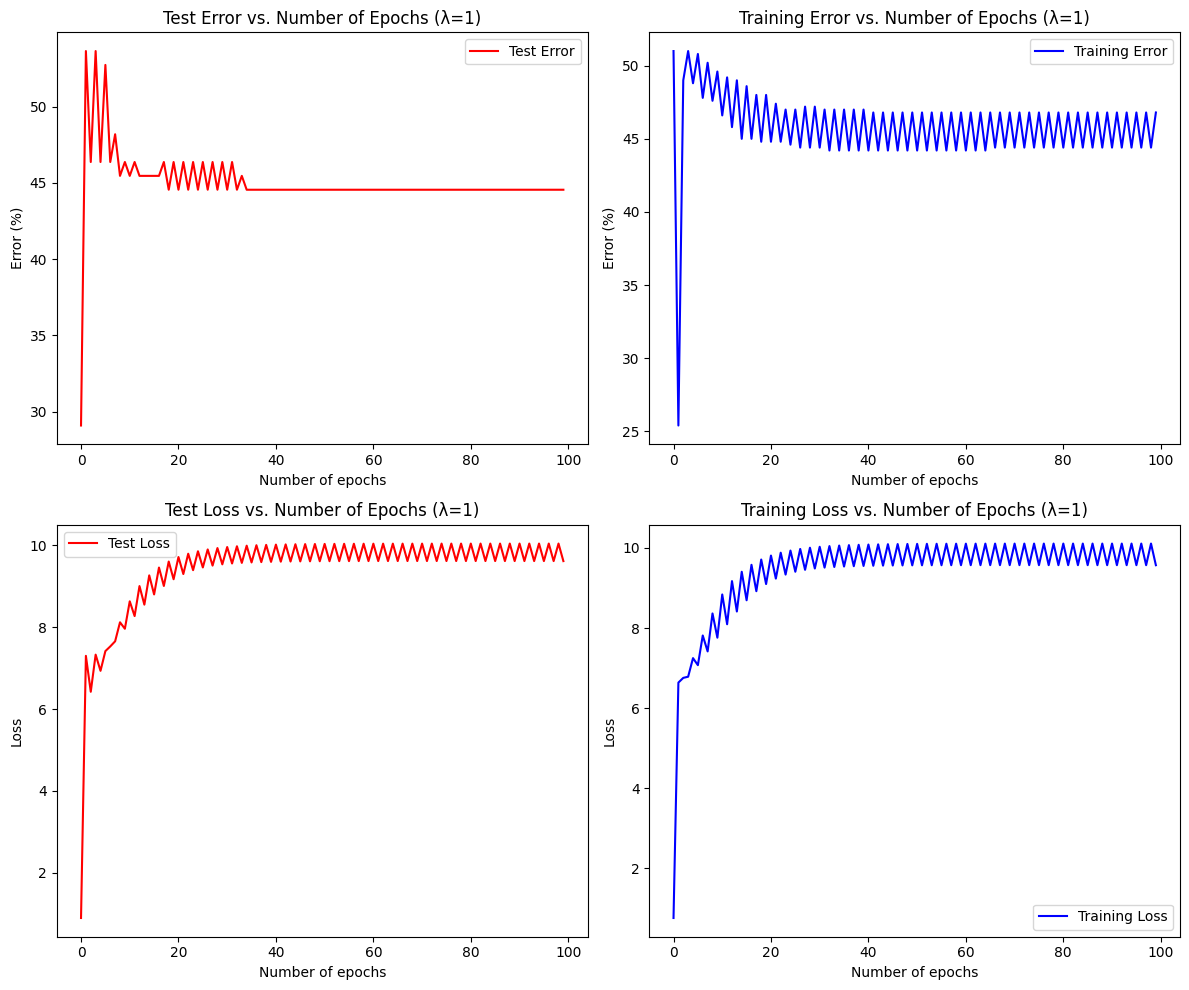

Parameters found for λ=1:
w = [-7.16795139e-02 -4.33898868e-02 -7.28494250e-01 -4.44964798e-01
 -7.76588376e-01 -1.08031027e+00 -3.98055344e-01 -7.20941841e-02
 -2.53307870e-01 -5.08612055e-01 -7.50583426e-01 -2.60519744e-01
 -5.88905881e-01 -8.43852553e-01 -2.10127644e-01 -4.54879596e-02
 -1.19895941e-01 -5.19804277e-01 -4.19371410e-01  7.53004755e-02
 -4.32660747e-01 -2.92962927e-02 -9.45616823e-04  3.14619000e-02
 -1.87972072e-01 -4.36933564e-01 -2.59942385e-01 -6.05905618e-01
 -5.21575758e-01 -3.33694295e-01  5.97757665e-03 -1.69286558e-01
 -1.34363519e-01  4.64608706e-02  3.82025889e-01 -3.22540232e-02
 -1.57425584e-01 -9.70929361e-02 -1.51878687e-01 -2.51869842e-03
  5.33072853e-03  6.57052885e-03  9.96431103e-01  4.72686929e-01
 -8.29032353e-02 -1.48854059e-01  2.93236304e-01 -1.65307990e-01
 -3.64080304e-02 -2.67271571e-02  1.52132598e-01  1.38913827e-01
 -5.45192886e-01  9.90564405e-02  5.86331044e-01 -4.24228557e-02
 -3.89493580e-02 -9.64438548e-02 -8.61225217e-01 -4.47656969

In [66]:
# Main function to run regularized logistic regression
def logistic_regression_regularized(lambda_):
    m, n = X_train.shape

    # Initialize parameters
    w = np.zeros(n)
    w0 = 0
    learning_rate = 0.1
    epochs = 100

    # Perform regularized gradient descent with tracking
    w, w0, cost_history_train, cost_history_test, error_history_train, error_history_test = gradient_descent_regularized(
        X_train, y_train, X_test, y_test, w, w0, learning_rate, epochs, lambda_)

    # Plot the required graphs
    plt.figure(figsize=(12, 10))

    # (a) Test error vs the number of epochs
    plt.subplot(2, 2, 1)
    plt.plot(range(len(error_history_test)), error_history_test, label='Test Error', color='red')
    plt.xlabel('Number of epochs')
    plt.ylabel('Error (%)')
    plt.title(f'Test Error vs. Number of Epochs (λ={lambda_})')
    plt.legend()

    # (b) Training error vs the number of epochs
    plt.subplot(2, 2, 2)
    plt.plot(range(len(error_history_train)), error_history_train, label='Training Error', color='blue')
    plt.xlabel('Number of epochs')
    plt.ylabel('Error (%)')
    plt.title(f'Training Error vs. Number of Epochs (λ={lambda_})')
    plt.legend()

    # (c) Test loss vs the number of epochs
    plt.subplot(2, 2, 3)
    plt.plot(range(len(cost_history_test)), cost_history_test, label='Test Loss', color='red')
    plt.xlabel('Number of epochs')
    plt.ylabel('Loss')
    plt.title(f'Test Loss vs. Number of Epochs (λ={lambda_})')
    plt.legend()

    # (d) Training loss vs the number of epochs
    plt.subplot(2, 2, 4)
    plt.plot(range(len(cost_history_train)), cost_history_train, label='Training Loss', color='blue')
    plt.xlabel('Number of epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss vs. Number of Epochs (λ={lambda_})')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # (e) Print the parameters w, w0 found for logistic regression
    print(f'Parameters found for λ={lambda_}:')
    print(f'w = {w}')
    print(f'w0 = {w0}')

    # Evaluate on test data
    z_test = np.dot(X_test, w) + w0
    predictions = sigmoid(z_test) >= 0.5  # Binary classification threshold at 0.5

# Run logistic regression with λ = 0.5
print("Running logistic regression with λ = 0.5")
logistic_regression_regularized(lambda_=0.5)

# Run logistic regression with λ = 1
print("\nRunning logistic regression with λ = 1")
logistic_regression_regularized(lambda_=1)



In [70]:
def load_data_fold(fold):
    X = pd.read_csv(f'trainData{fold}.csv', header=None).values
    y = pd.read_csv(f'trainLabels{fold}.csv', header=None).values.flatten()
    y = np.where(y == 5, 0, 1)  # Map labels from 5 and 6 to 0 and 1
    return X, y


In [71]:
def gradient_descent_cv(X, y, w, w0, learning_rate, epochs, lambda_):
    m = len(y)
    for epoch in range(epochs):
        # Compute predictions
        z = np.dot(X, w) + w0
        h = sigmoid(z)
        
        # Compute gradients with regularization (excluding bias term)
        dw = (1 / m) * np.dot(X.T, (h - y)) + lambda_ * w
        dw0 = (1 / m) * np.sum(h - y)  # Bias term is not regularized
        
        # Update parameters
        w -= learning_rate * dw
        w0 -= learning_rate * dw0
        
        # Convergence check (optional)
        # You can add convergence criteria if needed

    return w, w0


In [72]:
def cross_validate_lambda(lambda_values, epochs=100, learning_rate=0.1):
    avg_validation_errors = []
    
    for lambda_ in lambda_values:
        validation_errors = []
        
        for fold in range(1, 6):
            # Prepare validation set
            X_val, y_val = load_data_fold(fold)
            
            # Prepare training set (combine other folds)
            X_train = []
            y_train = []
            for other_fold in range(1, 6):
                if other_fold != fold:
                    X_other, y_other = load_data_fold(other_fold)
                    X_train.append(X_other)
                    y_train.append(y_other)
            X_train = np.vstack(X_train)
            y_train = np.hstack(y_train)
            
            # Initialize parameters
            m, n = X_train.shape
            w = np.zeros(n)
            w0 = 0
            
            # Train model using the new gradient descent function
            w, w0 = gradient_descent_cv(X_train, y_train, w, w0, learning_rate, epochs, lambda_)
            
            # Compute validation error
            z_val = np.dot(X_val, w) + w0
            h_val = sigmoid(z_val)
            predictions_val = (h_val >= 0.5).astype(int)
            error_val = np.mean(predictions_val != y_val) * 100  # Error in percentage
            validation_errors.append(error_val)
        
        # Compute average validation error for this lambda
        avg_error = np.mean(validation_errors)
        avg_validation_errors.append(avg_error)
        print(f'Lambda: {lambda_}, Cross-Validation Error: {avg_error:.2f}%')
    
    return avg_validation_errors


Lambda: 0, Cross-Validation Error: 22.20%
Lambda: 0.1, Cross-Validation Error: 27.60%
Lambda: 0.5, Cross-Validation Error: 38.20%
Lambda: 1, Cross-Validation Error: 43.60%
Lambda: 2, Cross-Validation Error: 47.20%
Lambda: 5, Cross-Validation Error: 48.60%
Lambda: 10, Cross-Validation Error: 48.60%


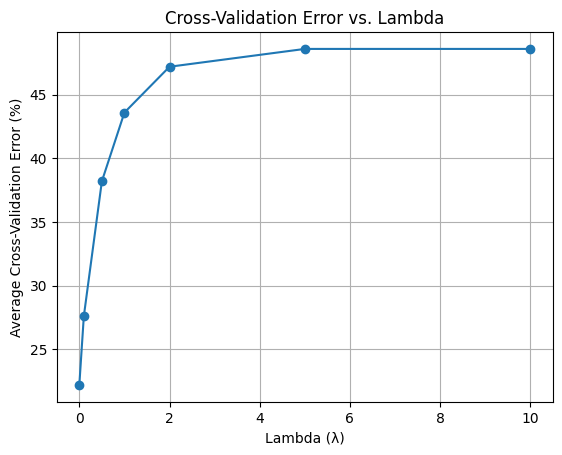

In [73]:
# Define lambda values to test
lambda_values = [0, 0.1, 0.5, 1, 2, 5, 10]

# Run cross-validation
avg_validation_errors = cross_validate_lambda(lambda_values)

# Plot cross-validation error vs lambda
plt.figure()
plt.plot(lambda_values, avg_validation_errors, marker='o')
plt.xlabel('Lambda (λ)')
plt.ylabel('Average Cross-Validation Error (%)')
plt.title('Cross-Validation Error vs. Lambda')
plt.grid(True)
plt.show()


In [74]:
# Combine all training data
X_train_list = []
y_train_list = []
for fold in range(1, 6):
    X_fold, y_fold = load_data_fold(fold)
    X_train_list.append(X_fold)
    y_train_list.append(y_fold)
X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)


In [75]:
# Find the lambda with the lowest cross-validation error
best_lambda = lambda_values[np.argmin(avg_validation_errors)]
print(f'Best Lambda: {best_lambda}')

# Initialize parameters
m, n = X_train.shape
w = np.zeros(n)
w0 = 0
learning_rate = 0.1
epochs = 100

# Train model using the best lambda
w, w0 = gradient_descent_cv(X_train, y_train, w, w0, learning_rate, epochs, best_lambda)


Best Lambda: 0


In [76]:
# Load test data
test_data = pd.read_csv('testData.csv', header=None).values
test_labels = pd.read_csv('testLabels.csv', header=None).values.flatten()
test_labels = np.where(test_labels == 5, 0, 1)

# Evaluate on test data
z_test = np.dot(test_data, w) + w0
h_test = sigmoid(z_test)
predictions_test = (h_test >= 0.5).astype(int)
test_error = np.mean(predictions_test != test_labels) * 100  # Error in percentage
print(f'Test Error with Best Lambda ({best_lambda}): {test_error:.2f}%')


Test Error with Best Lambda (0): 14.55%
